# Bank Marketing Campaign- Predicting Term Deposit (CRISP-DM)

## Problem Definition: 
 One of the most common marketing strategy In Banking sector is direct marketing campaigns through phone calls ,it is a form of advertising that allows organizations to communicate directly with customers to offer their services based on the client’s existing bank profile .Here we will consider term deposit as a banking service .

Direct marketing has significant challenges:

* The increasing number of marketing campaigns over time has reduced their effects on the general public.
* According to study positive response rates of direct marketing tend to be around 1-3% 
* Startegy like Telemarketing may have high financial and resource costs, but less ROI 
* Many people find direct marketing annoying and intrusive.
* If we reach a consumer who isn't interested in services, they are likely to find it irritating and this can create a negative brand association.

## Business Goal : 
to build a list of target customers who are likey to subscribe a term deposite. The more targeted our campaigns, the more successful they are likely to be.

## Project Objective : 
We will convert this problem into a machine learning classification problem .
We will build a model to predict whether a client will subscribe a term deposit or not so that the banks can arrange a better management of available resources by focusing on the potential customers “predicted” by the classifier .This will help them to design a more efficient and precise campaign strategy to reduce the costs,improve the profits and customer satisfaction .

#### Data Mining Technique to be used : Classification 

## Data Set Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

source : uci machine learning repository , link: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#

###  Attribute Information:
**Bank client data:**
* Age (numeric)
* Job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
* Marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown' ; note: 'divorced' means divorced or widowed)
* Education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
* Default: has credit in default? (categorical: 'no', 'yes', 'unknown')
* Housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
* Loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

**Related with the last contact of the current campaign:**
* Contact: contact communication type (categorical:
  'cellular','telephone')
* Month: last contact month of year (categorical: 'jan', 'feb', 'mar',
   …, 'nov', 'dec')
* Dayofweek: last contact day of the week (categorical:
  'mon','tue','wed','thu','fri')
* Duration: last contact duration, in seconds (numeric). Important
  note: this attribute highly affects the output target (e.g., if
  duration=0 then y='no'). Yet, the duration is not known before a call
  is performed. Also, after the end of the call y is obviously known.
  Thus, this input should only be included for benchmark purposes and
  should be discarded if the intention is to have a realistic
  predictive model.

**Other attributes:**
*  Campaign: number of contacts performed during this campaign and for 
   this client (numeric, includes last contact)
*  Pdays: number of days that passed by after the client was last
   contacted from a previous campaign (numeric; 999 means client was not
   previously contacted)
*  Previous: number of contacts performed before this campaign and for
   this client (numeric)
* Poutcome: outcome of the previous marketing campaign (categorical:
  'failure','nonexistent','success')

**Social and economic context attributes**
* Emp.var.rate: employment variation rate - quarterly indicator, it defines as a measure of the extent to which available labour resources (people available to work) are being used.
  (numeric)
* Cons.price.idx: consumer price index - monthly indicator (numeric), it expresses the change in the current prices of the market basket in terms of the prices during the same month in the previous year. 
* Cons.conf.idx: consumer confidence index - monthly indicator , CCI is a survey administered by The Conference Board, that measures how optimistic or pessimistic consumers are regarding their expected financial situation
  (numeric)
* Euribor3m: euribor 3 month rate - daily indicator (numeric), it is the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months
  Nr.employed: number of employees - quarterly indicator (numeric)
  
**Output variable (desired target):**
* y - has the client subscribed a term deposit? (binary: 'yes', 'no')


## Preliminary Data Analysis

In [1]:
import pandas as pd    
import seaborn as sns     
import numpy as np        
import matplotlib.pyplot as plt     
from scipy import stats       

In [2]:
df=pd.read_csv(r'D:\Linear Regression\bank-additional_bank-additional-full.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
# no null value present in the data set 

In [8]:
df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [9]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [11]:
# renameing 'y' as 'target'

In [12]:
df=df.rename(columns={'y':'target'})

In [13]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [14]:
df.target.value_counts()

no     36548
yes     4640
Name: target, dtype: int64

## Exploratory Data Analysis 

### Visualizing Categorical Variables

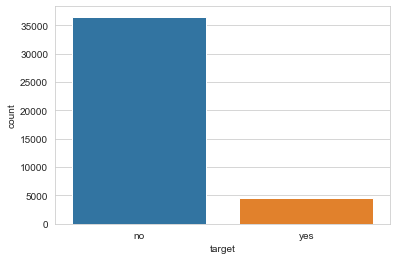

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.countplot(x='target',data=df)

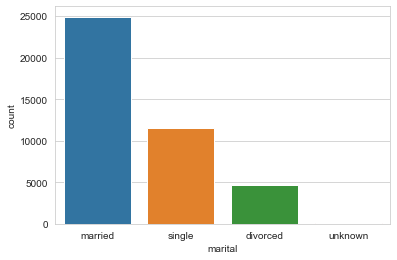

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(x='marital',data=df)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

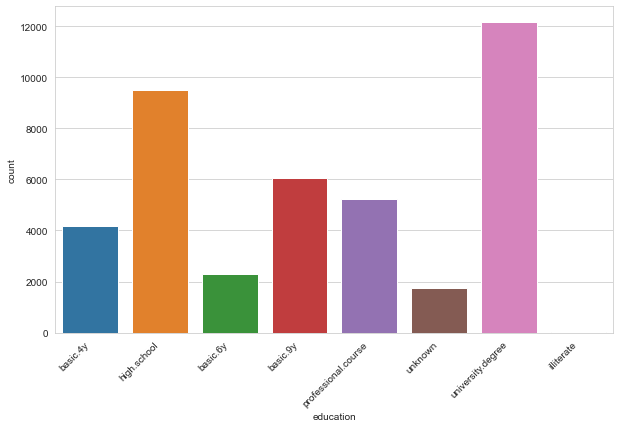

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='education',data=df)
plt.xticks(rotation=45, horizontalalignment='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

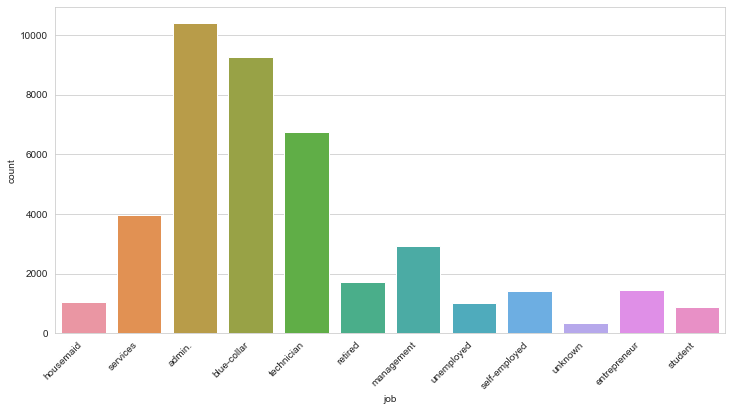

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x="job",data=df)
plt.xticks(rotation=45, horizontalalignment='right')

Text(0.5, 0, 'default')

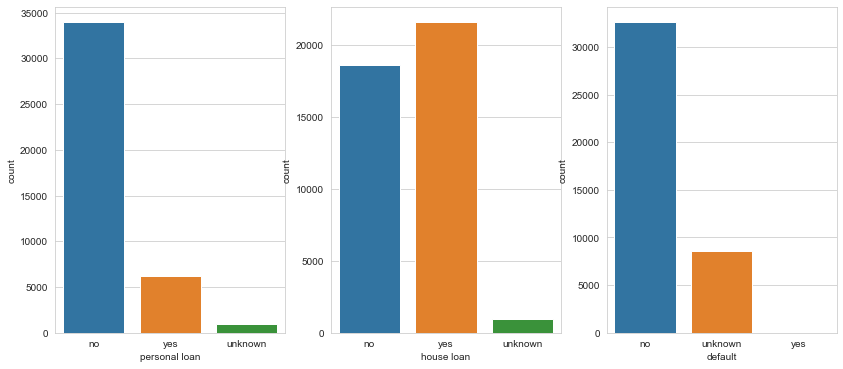

In [19]:
fig,(ax1,ax2,ax3) =plt.subplots(nrows = 1, ncols = 3,figsize=(14,6))
sns.countplot(x="loan",data=df,ax=ax1)
ax1.set_xlabel('personal loan')
sns.countplot(x="housing",data=df,ax=ax2)
ax2.set_xlabel('house loan')
sns.countplot(x="default",data=df,ax=ax3)
ax3.set_xlabel('default')

Text(0.5, 0, 'previous outcome')

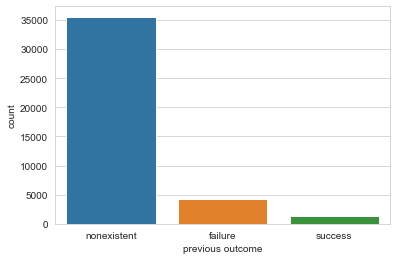

In [20]:
fig,ax=plt.subplots()
sns.countplot(x="poutcome",data=df)
ax.set_xlabel('previous outcome')

Text(0.5, 0, 'contcat type')

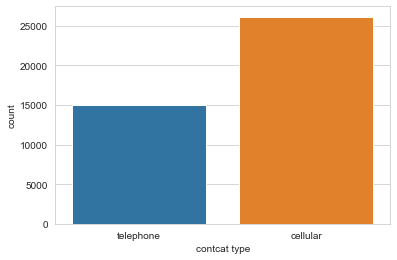

In [21]:
fig,ax=plt.subplots()
sns.countplot(x="contact",data=df)
ax.set_xlabel("contcat type")

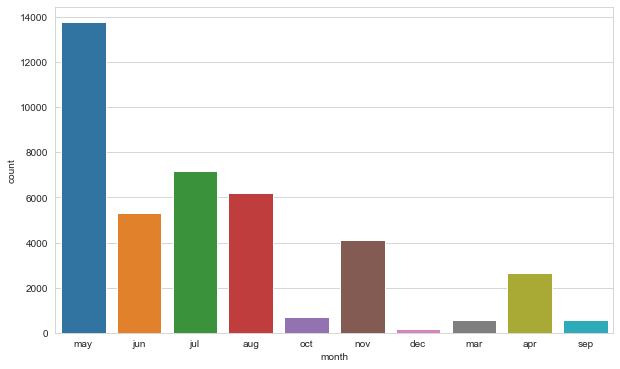

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x="month",data=df)

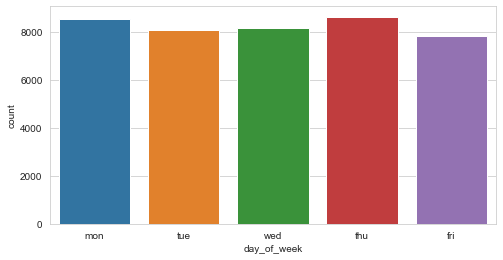

In [23]:
plt.figure(figsize=(8,4))
sns.countplot(x="day_of_week",data=df)

### Visualizing Numerical Variable 

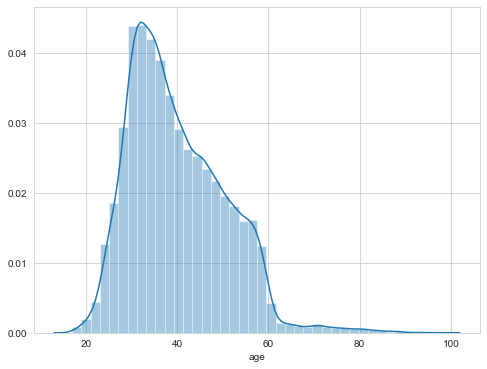

In [24]:
plt.figure(figsize=(8,6))
sns.distplot(df['age'],bins=40)

In [25]:
df.age.describe()

count    41188.00000
mean        40.02406
std         10.42125
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

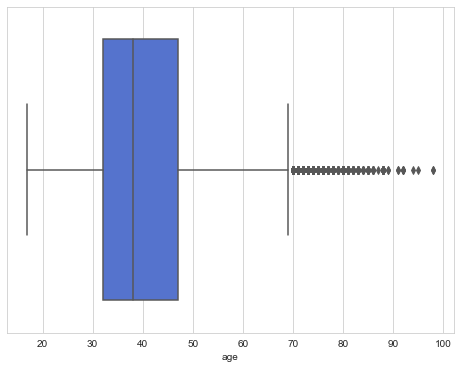

In [26]:
plt.figure(figsize=(8,6))
fig = sns.boxplot(x='age', data=df,color='royalblue')

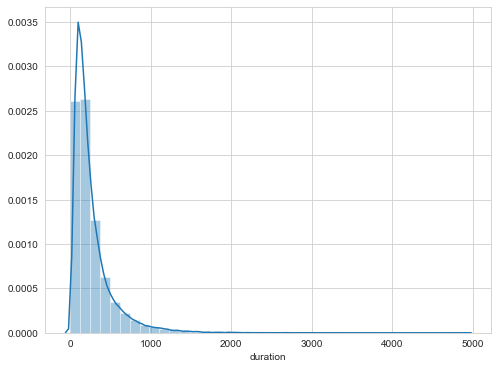

In [27]:
plt.figure(figsize=(8,6))
sns.distplot(df['duration'],bins=40)

In [28]:
df.duration.describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

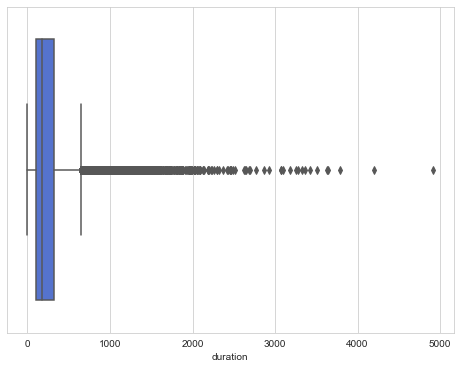

In [29]:
plt.figure(figsize=(8,6))
fig = sns.boxplot(x='duration', data=df,color='royalblue')

In [30]:
#converting target variable in 0 for no and 1 for yes
df['target']=df['target'].replace({'no':0,'yes':1})

In [31]:
df.target.value_counts()

0    36548
1     4640
Name: target, dtype: int64

## Bivariate analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

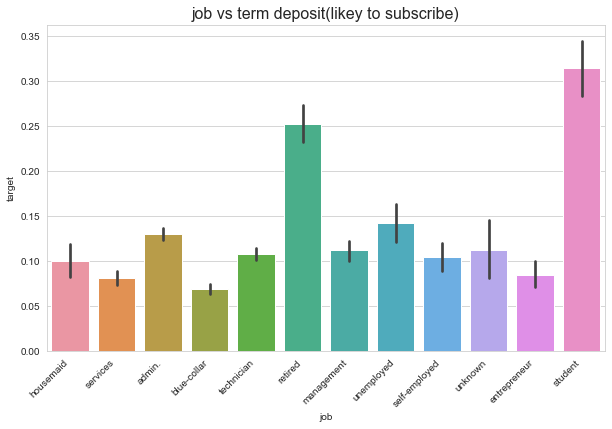

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x='job', y='target', data=df)
plt.title('job vs term deposit(likey to subscribe)',fontsize=16)
plt.xticks(rotation=45, horizontalalignment='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

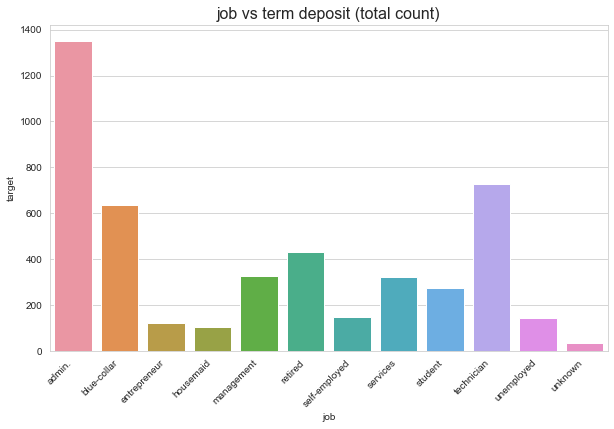

In [33]:
df1 = df.groupby('job').agg({'target':'sum'})
plt.figure(figsize=(10,6))
sns.barplot(x = df1.index, y = df1.target, data = df1)
plt.title('job vs term deposit (total count)',fontsize=16)
plt.xticks(rotation=45, horizontalalignment='right')

In [34]:
df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

Text(0.5, 1.0, 'marital vs term deposit(likey to subscribe)')

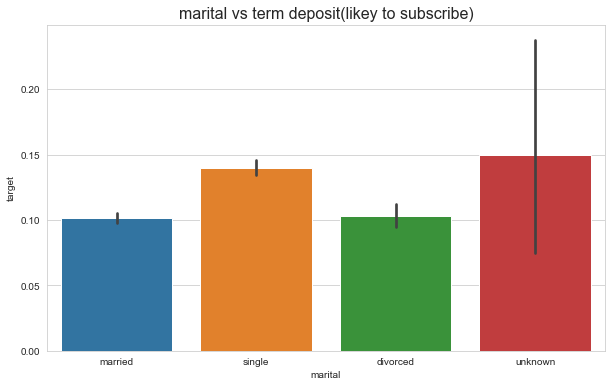

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(x='marital', y='target', data=df)
plt.title('marital vs term deposit(likey to subscribe)',fontsize=16)

Text(0.5, 1.0, 'marital vs term deposit (total count)')

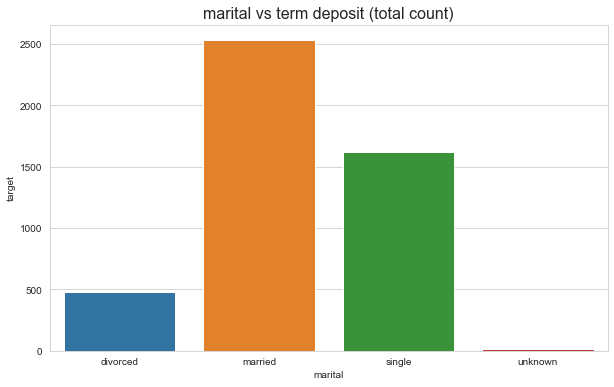

In [36]:
df1 = df.groupby('marital').agg({'target':'sum'})
plt.figure(figsize=(10,6))
sns.barplot(x = df1.index, y = df1.target, data = df1)
plt.title('marital vs term deposit (total count)',fontsize=16)

In [37]:
df.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Text(0.5, 1.0, 'education vs term deposit(likey to subscribe)')

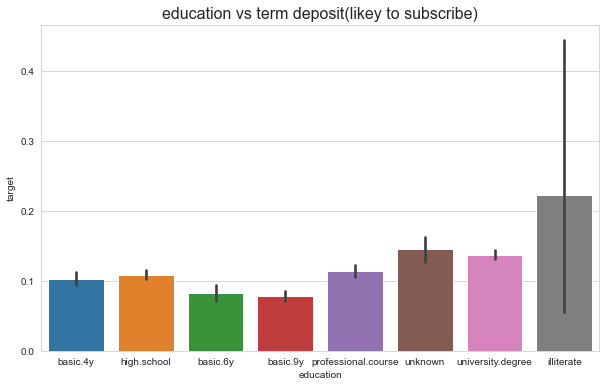

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x='education', y='target', data=df)
plt.title('education vs term deposit(likey to subscribe)',fontsize=16)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

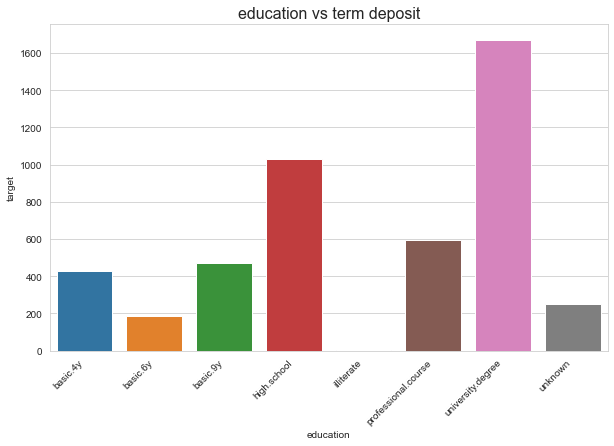

In [39]:
df1 = df.groupby('education').agg({'target':'sum'})
plt.figure(figsize=(10,6))
sns.barplot(x = df1.index, y = df1.target, data = df1)
plt.title('education vs term deposit',fontsize=16)
plt.xticks(rotation=45, horizontalalignment='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

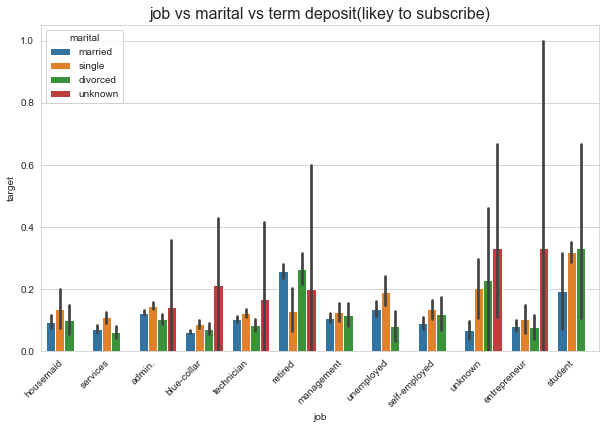

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x='job', y='target', hue='marital',data=df)
plt.title('job vs marital vs term deposit(likey to subscribe)',fontsize=16)
plt.xticks(rotation=45, horizontalalignment='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

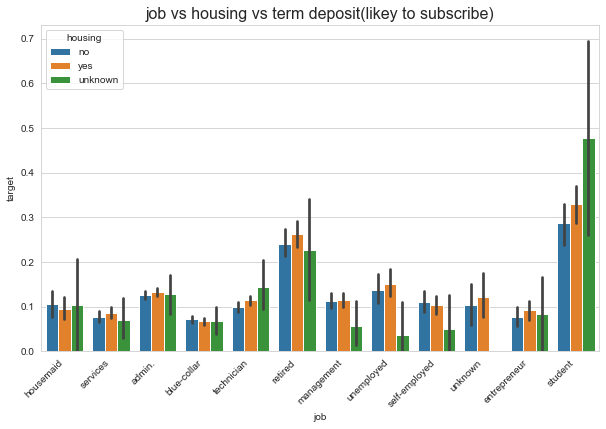

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(x='job', y='target',hue='housing', data=df)
plt.title('job vs housing vs term deposit(likey to subscribe)',fontsize=16)
plt.xticks(rotation=45, horizontalalignment='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

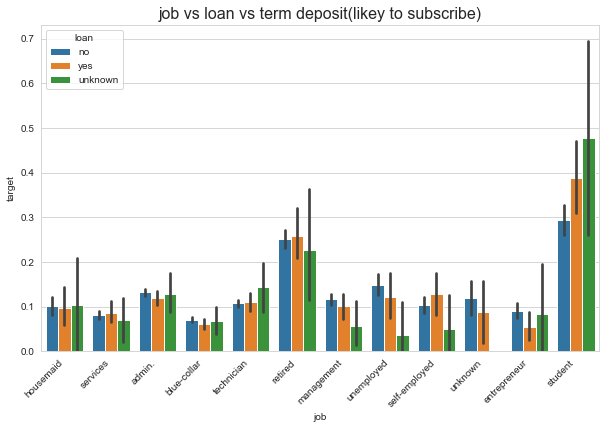

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(x='job', y='target',hue='loan', data=df)
plt.title('job vs loan vs term deposit(likey to subscribe)',fontsize=16)
plt.xticks(rotation=45, horizontalalignment='right')

Text(0.5, 1.0, 'month vs term deposit(likey to subscribe)')

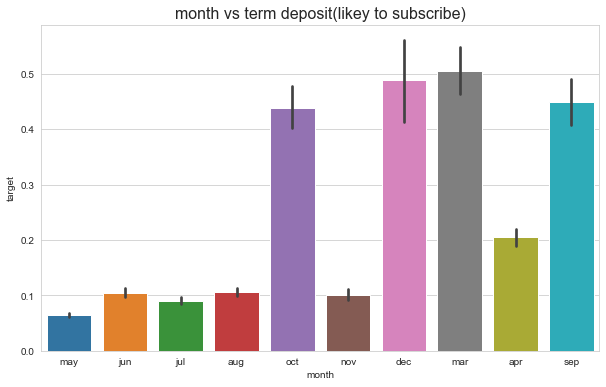

In [43]:
plt.figure(figsize=(10,6))
sns.barplot(x='month', y='target', data=df)
plt.title('month vs term deposit(likey to subscribe)',fontsize=16)

Text(0.5, 1.0, 'month vs term deposit (total)')

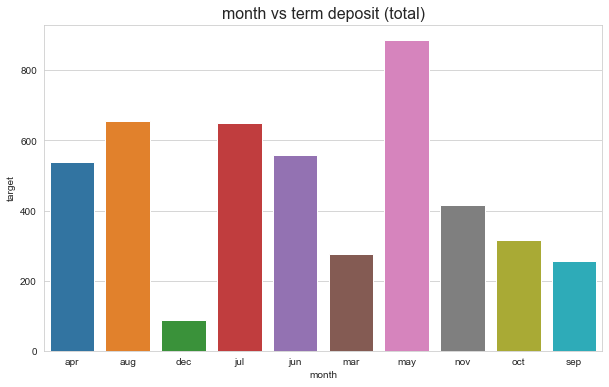

In [44]:
df1 = df.groupby('month').agg({'target':'sum'})
plt.figure(figsize=(10,6))
sns.barplot(x = df1.index, y = df1.target, data = df1)
plt.title('month vs term deposit (total)',fontsize=16)

In [45]:
df.month.value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

Text(0.5, 1.0, 'day_of_week vs term deposit(likey to subscribe)')

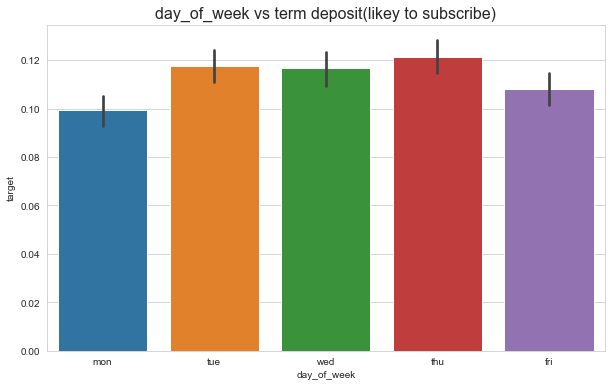

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(x='day_of_week', y='target', data=df)
plt.title('day_of_week vs term deposit(likey to subscribe)',fontsize=16)

Text(0.5, 1.0, 'day_of_week vs term deposit (total)')

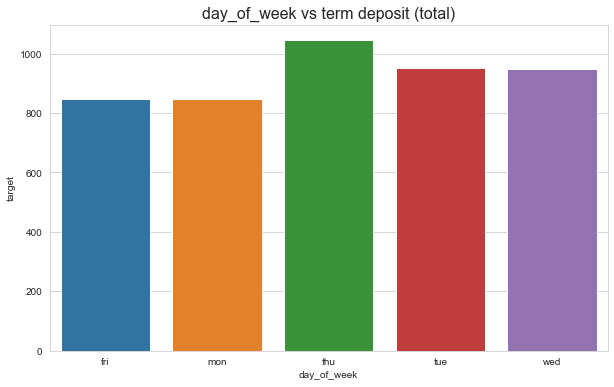

In [47]:
df1 = df.groupby('day_of_week').agg({'target':'sum'})
plt.figure(figsize=(10,6))
sns.barplot(x = df1.index, y = df1.target, data = df1)
plt.title('day_of_week vs term deposit (total)',fontsize=16)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Text(0.5, 1.0, 'correlation matrix for numerical variables')

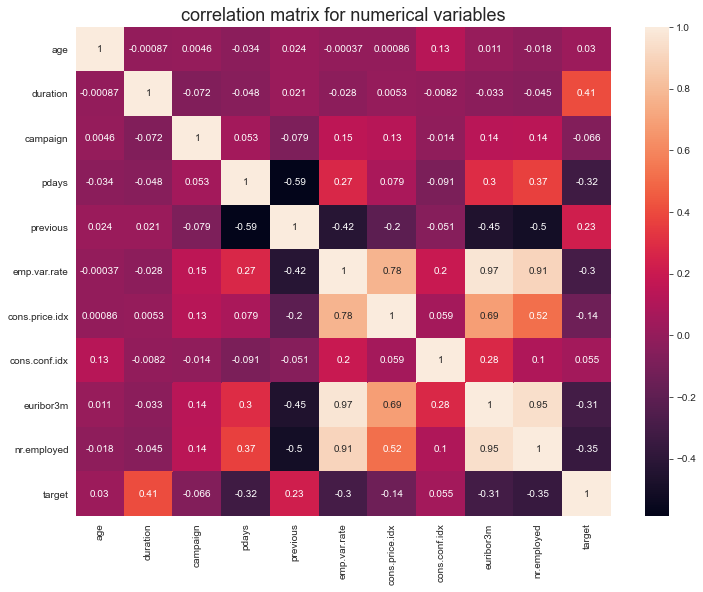

In [49]:
corrmat = df.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,annot=True,)
plt.title('correlation matrix for numerical variables',fontsize=18)

### Observations :
'emp.var.rate', 'cons.price.idx' , 'cons.conf.idx' , 'euribor3m' , and 'nr.employed' are highly correlated , we can not drop any of them without advise from domain expert so we will do factor analysis later for these variables 

## Data Preparation

We have to drop the 'duration' column beacuse the duration will be unknown before a call is performed so in training dataset we can not keep this, moreover after the the call anhow the outcome will be khnown 

In [50]:
df=df.drop('duration',axis=1)

In [51]:
df.shape

(41188, 20)

In [52]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [53]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'target'],
      dtype='object')

## Factor Analysis 
* This technique extracts maximum common variance from all variables and puts them into a common score.  

From the correlation matric we khnow that 'euribor3m','nr.employed','emp.var.rate','cons.price.idx' are highly correlated this will add bias to our model.We have to deal with this multicolinearity now we can not drop any of this with out advise from domain expertise so we will do factor analysis this technique extracts maximum common variance from all variables and puts them into a common score.  

In [54]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1)
df['factor_1']=pca.fit_transform(df[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed']])
df=df.drop(['emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],axis=1)

In [55]:
df.shape

(41188, 16)

In [56]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,target,factor_1
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,0,-24.028952
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,0,-24.028952
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,0,-24.028952
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,0,-24.028952
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,0,-24.028952


In [57]:
df.factor_1.describe()

count    4.118800e+04
mean    -2.887263e-12
std      7.228631e+01
min     -6.111921e+01
25%     -6.107833e+01
50%     -2.402902e+01
75%      6.803312e+01
max      2.034818e+02
Name: factor_1, dtype: float64

In [58]:
df.pdays.value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

###  separating categorical variable

In [59]:
cat_columns_df=df.select_dtypes(include=['object'])

In [60]:
cat_columns_df

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


### separating numerical value 

In [61]:
num_columns_df=df.select_dtypes(exclude=['object'])

In [62]:
num_columns_df

,age,campaign,pdays,previous,target,factor_1
0,56,1,999,0,0,-24.028952
1,57,1,999,0,0,-24.028952
2,37,1,999,0,0,-24.028952
3,40,1,999,0,0,-24.028952
4,56,1,999,0,0,-24.028952
...,...,...,...,...,...,...
41183,73,1,999,0,1,203.481754
41184,46,1,999,0,0,203.481754
41185,56,2,999,0,0,203.481754
41186,44,1,999,0,1,203.481754


In [63]:
num_columns_df = num_columns_df.drop('target',axis=1)
num_columns_df.shape

(41188, 5)

In [64]:
num_columns_df.columns

Index(['age', 'campaign', 'pdays', 'previous', 'factor_1'], dtype='object')

In [65]:
#creating test data set 
df_test=df.target.astype(dtype='bool')

In [66]:
df_test.shape

(41188,)

In [67]:
df_test.dtype

dtype('bool')

### creating dummy variables form categorical varibales 

In [68]:
dummy_columns_df=pd.get_dummies(cat_columns_df,drop_first=True)
dummy_columns_df.shape

(41188, 43)

### scaling numerical variables 

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_columns_scaled_df=pd.DataFrame(scaler.fit_transform(num_columns_df),columns=num_columns_df.columns)

In [70]:
num_columns_scaled_df

,age,campaign,pdays,previous,factor_1
0,1.533034,-0.565922,0.195414,-0.349494,-0.332418
1,1.628993,-0.565922,0.195414,-0.349494,-0.332418
2,-0.290186,-0.565922,0.195414,-0.349494,-0.332418
3,-0.002309,-0.565922,0.195414,-0.349494,-0.332418
4,1.533034,-0.565922,0.195414,-0.349494,-0.332418
...,...,...,...,...,...
41183,3.164336,-0.565922,0.195414,-0.349494,2.814976
41184,0.573445,-0.565922,0.195414,-0.349494,2.814976
41185,1.533034,-0.204909,0.195414,-0.349494,2.814976
41186,0.381527,-0.565922,0.195414,-0.349494,2.814976


#### Creating Train Data set 

In [71]:
df_train = pd.concat([num_columns_scaled_df, dummy_columns_df], axis=1,sort=False)
df_train

,age,campaign,pdays,previous,factor_1,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,1.533034,-0.565922,0.195414,-0.349494,-0.332418,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
1,1.628993,-0.565922,0.195414,-0.349494,-0.332418,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,-0.290186,-0.565922,0.195414,-0.349494,-0.332418,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,-0.002309,-0.565922,0.195414,-0.349494,-0.332418,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
4,1.533034,-0.565922,0.195414,-0.349494,-0.332418,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,-0.565922,0.195414,-0.349494,2.814976,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
41184,0.573445,-0.565922,0.195414,-0.349494,2.814976,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
41185,1.533034,-0.204909,0.195414,-0.349494,2.814976,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
41186,0.381527,-0.565922,0.195414,-0.349494,2.814976,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [72]:
df_train.shape

(41188, 48)

#### Train Test Spliting

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_train,df_test,test_size=0.2,random_state=101)

In [74]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32950, 48)
(8238, 48)
(32950,)
(8238,)


#### Handling Imbalance Data 

In [75]:
from collections import Counter
print(Counter(y_train))

Counter({False: 29269, True: 3681})


Yes : 88.82 %
No : 11.17 %

### We will use Random Oversampling technique to balance the data , this method randomly selectes examples from the minority class, with replacement, and adding them to the training dataset.

In [76]:
from imblearn.over_sampling import RandomOverSampler
RO = RandomOverSampler(sampling_strategy='minority')

In [77]:
X_train_os,y_train_os = RO.fit_sample(X_train,y_train)

In [78]:
X_train_os.shape,y_train_os.shape

((58538, 48), (58538,))

In [79]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_train_os))


Counter({False: 29269, True: 3681})
Counter({False: 29269, True: 29269})


# Model and Evaluation 

### Model used 
* Logistic Regression 
* K-Nearest Neighbor
* Decision Tree
* Random Forest 

### Evaluation metrics :
* Accuracy Score 
* F1 Score
* Precision Score 
* Recall Score 
* ROC AUC Score 
* Learning curve 

### Evaluation method :
* As this is a classification problem we will mainly consider the F1 and ROC     AUC score 
* Satisfactory Recall Score : Our objective will be reducing False Negetive       count,we can not miss out our potential customer 
* Satisfactory Precision Score : We have to bring Flase Positive count low so     that we save ourselves from wasting money and effort . 


In [80]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve,accuracy_score,precision_score, recall_score

In [81]:
def classification_metrics(x,y) :
    accuracy = metrics.accuracy_score(x,y)
    F1_weighted= metrics.f1_score(x,y,average='weighted')
    F1_macro= metrics.f1_score(x,y,average='macro')
    precision = metrics.precision_score(x,y)
    recall=metrics.recall_score(x,y)
    cm= metrics.confusion_matrix(x,y)
    
    print('accuracy score is :',accuracy )
    print('F1 weighted score is :',F1_weighted )
    print('F1 macro score is :',F1_macro )
    print('precision score is :',precision )
    print('recall score is :',recall )
    sns.heatmap(cm,annot=True,cmap='Blues',fmt='g')
    plt.title('Confusion Matrix',fontsize=16)

## Logistic Regression 

In [82]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train_os,y_train_os)
y_predLR=LR.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy score is : 0.8168244719592134
F1 weighted score is : 0.8382031152464563
F1 macro score is : 0.6660846113287808
precision score is : 0.3423165137614679
recall score is : 0.6225234619395204


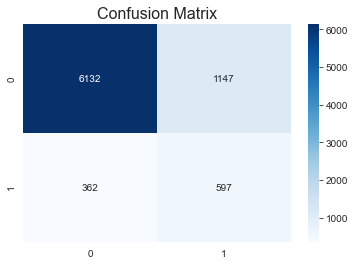

In [83]:
classification_metrics(y_test,y_predLR)

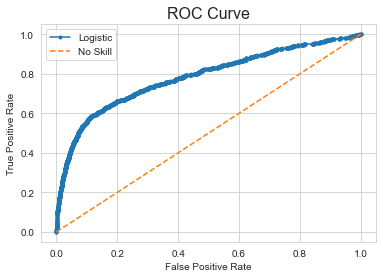

AUC ROC score is : 0.73247343587428


In [84]:
LR_probs = LR.predict_proba(X_test)[:,1]
NS_probs = [0 for _ in range(len(y_test))]
lr_fpr, lr_tpr, lr_threshold = roc_curve(y_test, LR_probs)
ns_fpr, ns_tpr, ns_threshold = roc_curve(y_test, NS_probs)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve',fontsize=16)
plt.legend()
plt.show()

print('AUC ROC score is :' ,metrics.roc_auc_score(y_test,y_predLR))

## Knn Classifier

In [85]:
from  sklearn.neighbors import KNeighborsClassifier
scores = []
recall=[]
for k in range(1,25,2) :
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_os,y_train_os)
    y_pred=knn.predict(X_test)
    scores.append(metrics.recall_score(y_test,y_pred))
    recall.append(metrics.recall_score(y_test,y_pred))

Text(0, 0.5, 'Testing Accuracy')

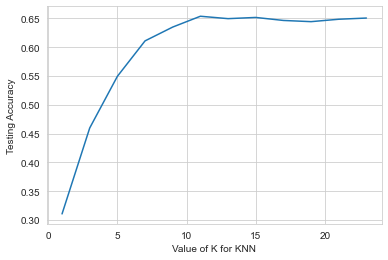

In [86]:
plt.plot(range(1,25,2), scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

accuracy score is : 0.721048798252003
F1 weighted score is : 0.7670480395758149
F1 macro score is : 0.5828178715362131
precision score is : 0.23610563657863617
recall score is : 0.6246089676746611


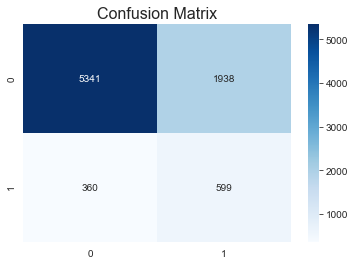

In [87]:
#will consider the optimun k value as 14 
knn=KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train_os,y_train_os)
y_predKNN=knn.predict(X_test)
classification_metrics(y_test,y_predKNN)

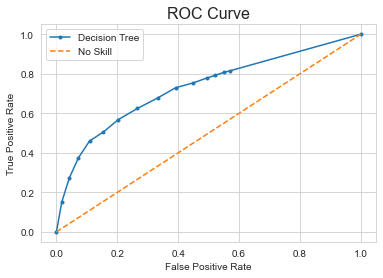

AUC ROC score is : 0.6791818021502857


In [88]:
KNN_probs = knn.predict_proba(X_test)[:,1]
NS_probs = [0 for _ in range(len(y_test))]
knn_fpr, knn_tpr, _ = roc_curve(y_test, KNN_probs)
ns_fpr, ns_tpr, ns_threshold = roc_curve(y_test, NS_probs)
plt.plot(knn_fpr, knn_tpr, marker='.', label='Decision Tree')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve',fontsize=16)
plt.legend()
plt.show()
print('AUC ROC score is :' ,metrics.roc_auc_score(y_test,y_predKNN))

## Decision Tree Classifier 

In [89]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train_os,y_train_os)
y_predDT=DT.predict(X_test)

accuracy score is : 0.8360038844379704
F1 weighted score is : 0.8371331317729909
F1 macro score is : 0.6069123847623591
precision score is : 0.302020202020202
recall score is : 0.31178310740354537


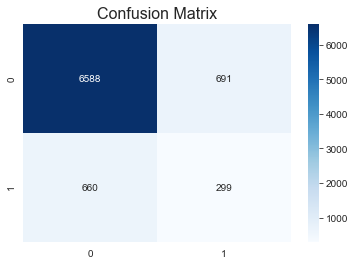

In [90]:
classification_metrics(y_test,y_predDT)

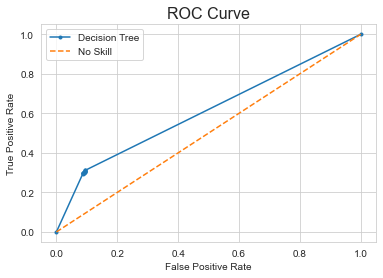

AUC ROC score is : 0.6084262425326561


In [91]:
DT_probs = DT.predict_proba(X_test)[:,1]
NS_probs = [0 for _ in range(len(y_test))]
dt_fpr, dt_tpr, _ = roc_curve(y_test, DT_probs)
ns_fpr, ns_tpr, ns_threshold = roc_curve(y_test, NS_probs)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve',fontsize=16)
plt.legend()
plt.show()
print('AUC ROC score is :' ,metrics.roc_auc_score(y_test,y_predDT))

## Random Forest Classifier 

In [92]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train_os,y_train_os)
y_predRF=RF.predict(X_test)

accuracy score is : 0.8812818645302258
F1 weighted score is : 0.8739726555975019
F1 macro score is : 0.6765615425427367
precision score is : 0.4868965517241379
recall score is : 0.3680917622523462


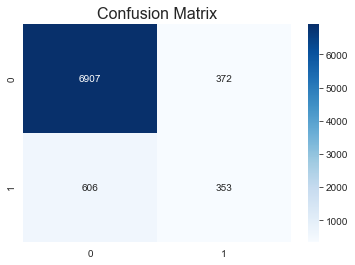

In [93]:
classification_metrics(y_test,y_predRF)

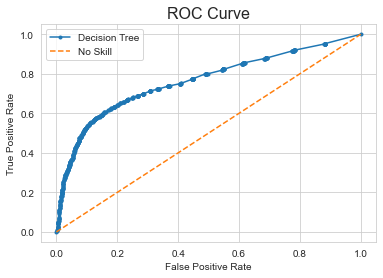

AUC ROC score is : 0.658492920554666


In [94]:
RF_probs = RF.predict_proba(X_test)[:,1]
NS_probs = [0 for _ in range(len(y_test))]
rf_fpr, rf_tpr, _ = roc_curve(y_test, RF_probs)
ns_fpr, ns_tpr, ns_threshold = roc_curve(y_test, NS_probs)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Decision Tree')
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve',fontsize=16)
plt.legend()
plt.show()
print('AUC ROC score is :' ,metrics.roc_auc_score(y_test,y_predRF))

### The False Negative count for Logistic Regression is the least, also the Recall, F1, AUC ROC  scores are comparatively better for this model, we will try to manipulate the threshold value so that we can improve the Recall value .

In [95]:
LR_probs = LR.predict_proba(X_test)[:,1]

In [96]:
LR_probs

array([0.19006464, 0.31708893, 0.20093304, ..., 0.16081921, 0.32391487,
       0.26529469])

In [97]:
lr_threshold

array([1.98758373, 0.98758373, 0.9856867 , ..., 0.07168599, 0.07012573,
       0.00975721])

In [98]:
recall_sc = []
for thres in lr_threshold:
    y_predLR = np.where(LR_probs>thres,1,0)
    recall_sc.append(metrics.recall_score(y_test, y_predLR))
    
df_score = pd.concat([pd.Series(lr_threshold), pd.Series(recall_sc)],axis=1)
df_score.columns = ['thresholds', 'recall_sc']
df_score.head

<bound method NDFrame.head of       thresholds  recall_sc
0       1.987584   0.000000
1       0.987584   0.000000
2       0.985687   0.002086
3       0.985375   0.003128
4       0.979614   0.015641
...          ...        ...
1485    0.117259   0.997914
1486    0.116980   0.997914
1487    0.071686   0.998957
1488    0.070126   0.998957
1489    0.009757   1.000000

[1490 rows x 2 columns]>

In [99]:
#we will try to increase the recall value upto 70 percent 
df_score = df_score[df_score['recall_sc']< 0.80]

In [100]:
df_score.sort_values(by='recall_sc', ascending=False, inplace=True)
df_score

<ipython-input-100-e090341541e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_score.sort_values(by='recall_sc', ascending=False, inplace=True)


,thresholds,recall_sc
1065,0.330126,0.799791
1064,0.330318,0.799791
1063,0.330338,0.799791
1062,0.330346,0.799791
1061,0.330445,0.798749
...,...,...
4,0.979614,0.015641
3,0.985375,0.003128
2,0.985687,0.002086
1,0.987584,0.000000


In [101]:
#for threshold 0.40 the recall score is maximum 
thres=0.33

In [102]:
y_predLR_final = np.where(LR_probs>thres,1,0)

accuracy score is : 0.5694343287205632
F1 weighted score is : 0.6436771166104002
F1 macro score is : 0.4954261152000464
precision score is : 0.18622696411251213
recall score is : 0.8008342022940563


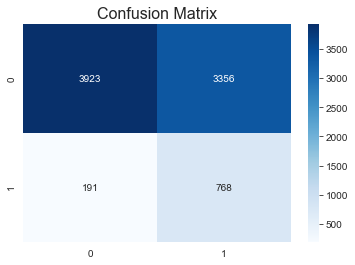

In [103]:
classification_metrics(y_test,y_predLR_final)

In [104]:
print('AUC ROC score is :' ,metrics.roc_auc_score(y_test,y_predLR_final))

AUC ROC score is : 0.6698909299696686


### Though we were able to improve the recall lvalue and decrease the FN count but the FP count also increase heavily, so there is a trade-off ,now considering the business expectation we can take decision about this and tune the model , 


In [105]:
### later on we will try to hypertune the knn,decison tree and random forest  model and will check the results 